In [4]:
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient,OpenAIChatCompletionClient
from dotenv import load_dotenv
from azure.identity import DefaultAzureCredential,get_bearer_token_provider
from autogen_core.models import UserMessage


load_dotenv()

False

In [4]:
# Create the token provider
token_provider = get_bearer_token_provider(
    DefaultAzureCredential(),
    "https://cognitiveservices.azure.com/.default",
)

az_model_client = AzureOpenAIChatCompletionClient(
    azure_deployment="gpt-4o-mini",
    model="gpt-4o-mini",
    api_version="2024-06-01",
    azure_endpoint="https://azopenai-langchain.openai.azure.com/",
    azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    # api_key="sk-...", # For key-based authentication.
)

In [7]:
agent = AssistantAgent(
    name="assistant",
    model_client=az_model_client
)

await agent.run(task="How ar you?")

TaskResult(messages=[TextMessage(id='83fe730d-eca0-4843-a571-5a587d8e8123', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 5, 3, 34, 18, 55418, tzinfo=datetime.timezone.utc), content='How ar you?', type='TextMessage'), TextMessage(id='2184d73a-8e51-461c-821d-69b884418d23', source='assistant', models_usage=RequestUsage(prompt_tokens=40, completion_tokens=16), metadata={}, created_at=datetime.datetime(2025, 7, 5, 3, 34, 32, 765803, tzinfo=datetime.timezone.utc), content="I'm here and ready to assist you! How can I help you today?", type='TextMessage')], stop_reason=None)

In [8]:
await agent.run(task="What was my earlier question?")

TaskResult(messages=[TextMessage(id='8a213e23-af4a-44a7-bfaf-5d4b5294bf85', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 5, 3, 34, 55, 625825, tzinfo=datetime.timezone.utc), content='What was my earlier question?', type='TextMessage'), TextMessage(id='34b38e7e-eeb2-459e-9fa4-89c755859a4f', source='assistant', models_usage=RequestUsage(prompt_tokens=70, completion_tokens=19), metadata={}, created_at=datetime.datetime(2025, 7, 5, 3, 35, 4, 421459, tzinfo=datetime.timezone.utc), content='Your earlier question was, "How ar you?" Would you like to ask anything else?', type='TextMessage')], stop_reason=None)

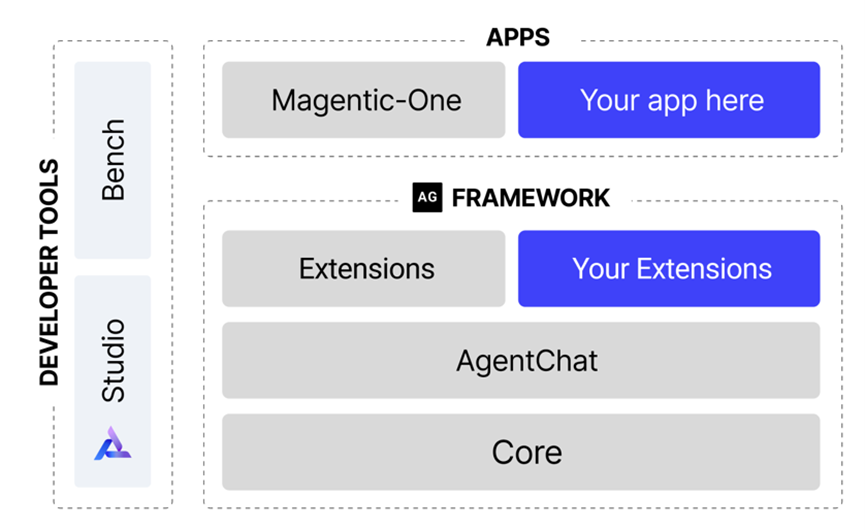

In [ ]:
## Open Router

open_router_model_client = OpenAIChatCompletionClient(
    base_url="https://openrouter.ai/api/v1",
    model="deepseek/deepseek-r1-0528:free",
    api_key="<deepseek key>",
    model_info={
        "family": "deepseek",
        "vision": True,
        "function_calling": True,
        "json_output": False
    }
)

await open_router_model_client.create([UserMessage(content="What is the capital of France?", source="user")])

c:\Users\vnallava\OneDrive - Insight\Desktop\Learning\AiAgent-AutoGen\.venv\Lib\site-packages\autogen_ext\models\openai\_openai_client.py:439: UserWarning: Missing required field 'structured_output' in ModelInfo. This field will be required in a future version of AutoGen.
  validate_model_info(self._model_info)


CreateResult(finish_reason='stop', content='The capital of France is Paris. Known for its iconic landmarks such as the Eiffel Tower, Louvre Museum, and Notre-Dame Cathedral, Paris is not only the political center but also a global hub for art, fashion, and culture.', usage=RequestUsage(prompt_tokens=13, completion_tokens=201), cached=False, logprobs=None, thought=None)